<a href="https://colab.research.google.com/github/SergioCuadrado08/PSD_Repository/blob/main/Practica_IFFT_20NNOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRERIAS

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

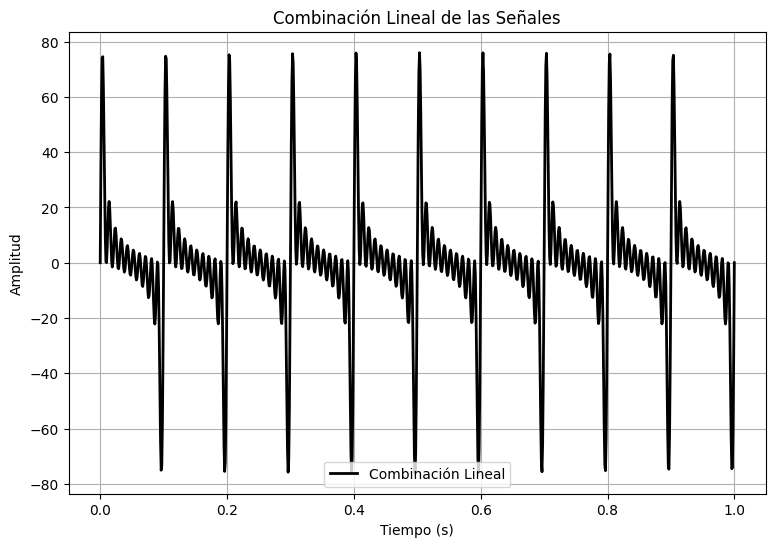

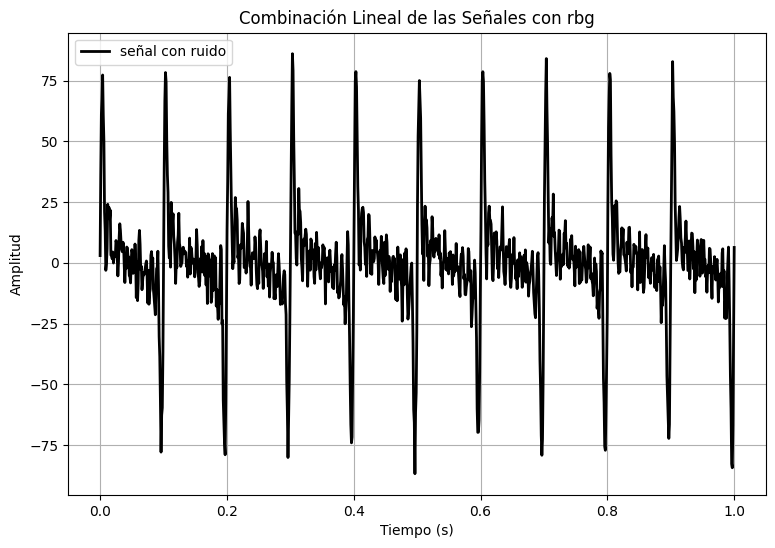

In [10]:
f_0 = 1000
T = 1
t = np.linspace(0, T, int(f_0 * T))

# Generación de las señales sinusoidales
frecuencias = np.linspace(10, 100, 10)  # Frecuencias de 10 a 100 Hz
#amplitudes = np.random.rand(10)         # Amplitudes aleatorias
wn = np.random.normal(0, 5, f_0)

# Combinación lineal de las señales
combinacion_lineal = np.zeros_like(t)
for i in range(10):
  señales = 10* np.sin(2 * np.pi * frecuencias[i]*t)
  combinacion_lineal += señales
final =combinacion_lineal + wn


#FFT
fft_final = np.fft.fft(final)
frecuencia_fft = np.fft.fftfreq(len(t), d=(t[1]-t[0]))
magnitud_fft = np.abs(fft_final)
#IFFT
ifft_final = np.fft.ifft(fft_final)

# Graficar la combinación de senos
plt.figure(figsize=(9, 6))
plt.plot(t, combinacion_lineal, label='Combinación Lineal', color='black', linewidth=2)
plt.title('Combinación Lineal de las Señales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# Graficar la combinación de senos con ruido
plt.figure(figsize=(9,6))
plt.plot(t, final, label='señal con ruido', color='black', linewidth=2)
plt.title('Combinación Lineal de las Señales con rbg')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


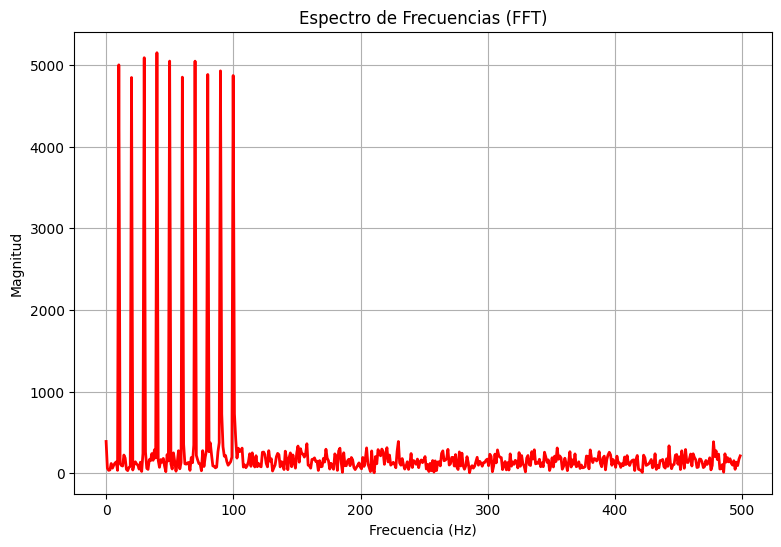

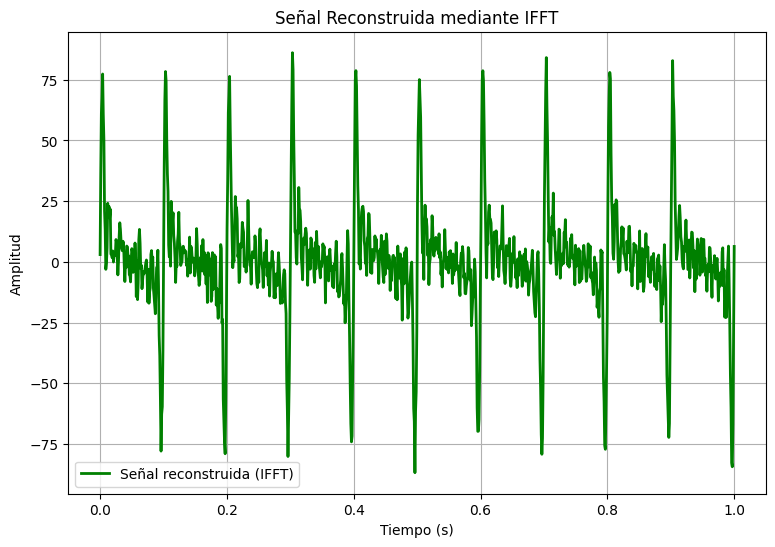

In [12]:
##Plot de la tranformada y la trnasporfada inversa

plt.figure(figsize=(9, 6))
plt.plot(frecuencia_fft[:len(frecuencia_fft)//2], magnitud_fft[:len(frecuencia_fft)//2], color='red', linewidth=2)
plt.title('Espectro de Frecuencias (FFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()
plt.show()


plt.figure(figsize=(9, 6))
plt.plot(t, np.real(ifft_final), label='Señal reconstruida (IFFT)', color='green', linewidth=2)
plt.title('Señal Reconstruida mediante IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

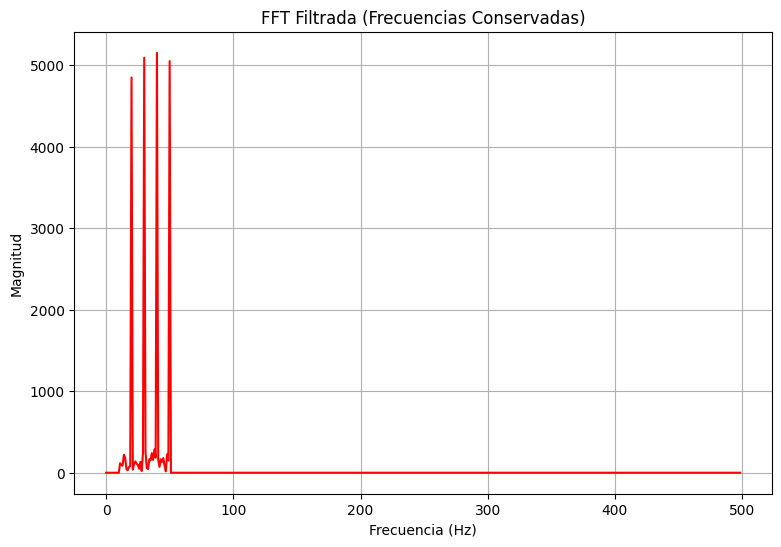

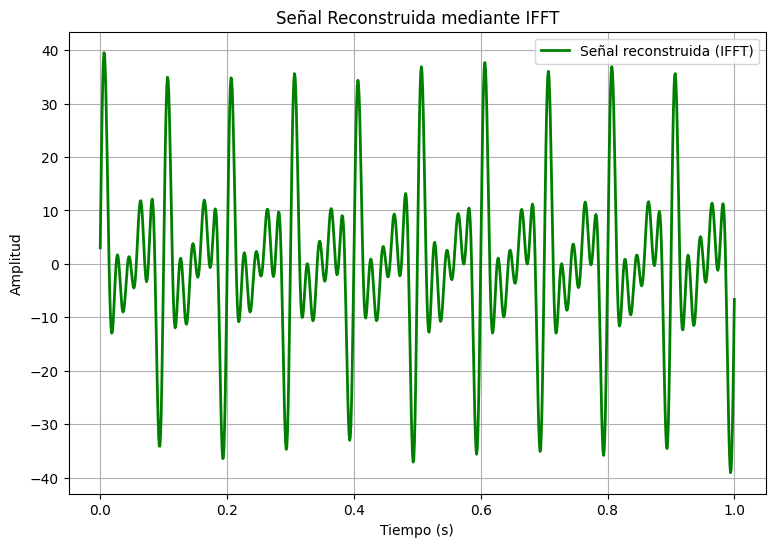

In [19]:
## aplicando el filtro para eliminar componentes

filtro = np.zeros_like(fft_final)
filtro[(frecuencia_fft >= 10) & (frecuencia_fft <= 50)] = 1
filtro[(frecuencia_fft <= -10) & (frecuencia_fft >= -50)] = 1

señal_filtrada = fft_final * filtro


#volviendo a la funcion de el tiemopo

señal_filtrada_tiempo = np.fft.ifft(señal_filtrada)

plt.figure(figsize=(9, 6))
plt.plot(frecuencia_fft[:len(frecuencia_fft)//2], np.abs(señal_filtrada[:len(frecuencia_fft)//2]), color='red')
plt.title('FFT Filtrada (Frecuencias Conservadas)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()
plt.show()


## Filtrada en el tiempo
plt.figure(figsize=(9, 6))
plt.plot(t, np.real(señal_filtrada_tiempo), label='Señal reconstruida (IFFT)', color='green', linewidth=2)
plt.title('Señal Reconstruida mediante IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


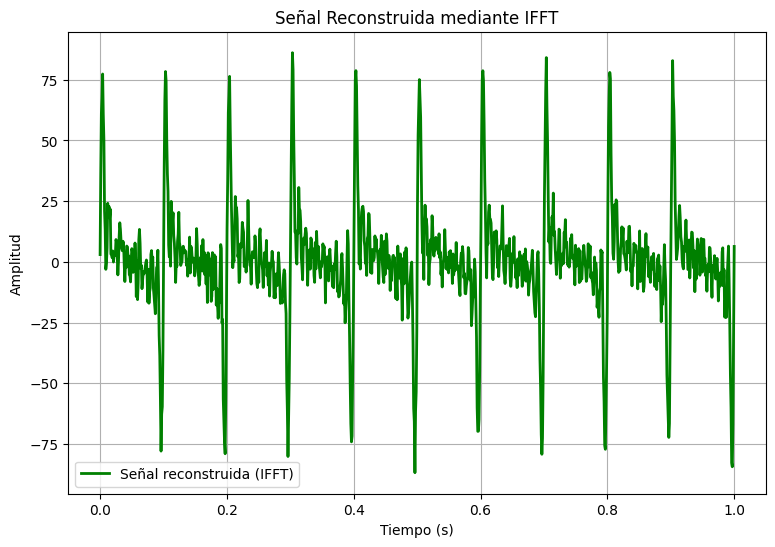

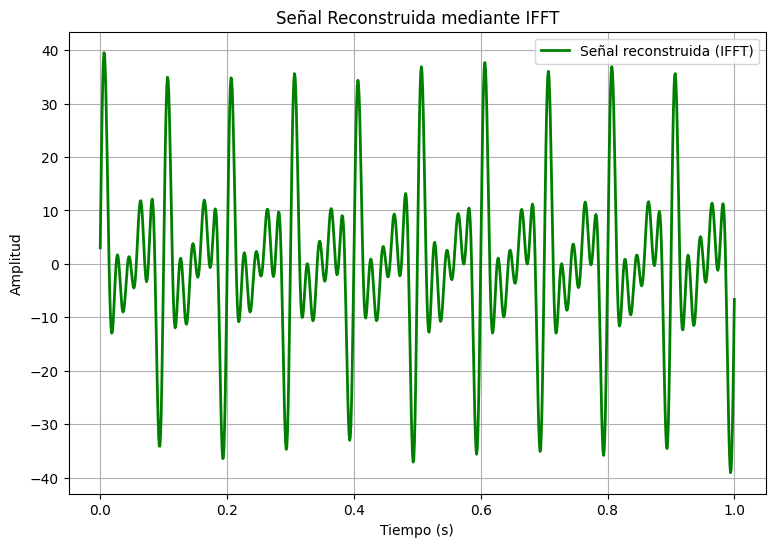

In [20]:
### Comparacion de la señal original con ruido y la señal luego del filtro

plt.figure(figsize=(9, 6))
plt.plot(t, np.real(ifft_final), label='Señal reconstruida (IFFT)', color='green', linewidth=2)
plt.title('Señal Reconstruida mediante IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


## Filtrada en el tiempo
plt.figure(figsize=(9, 6))
plt.plot(t, np.real(señal_filtrada_tiempo), label='Señal reconstruida (IFFT)', color='green', linewidth=2)
plt.title('Señal Reconstruida mediante IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()
